# Deep Learning IAS 
## Auteur: Papa Séga WADE [https://solo.to/mathspsw]
_________________________________________________________________________________________________________________________

# Exemple d'application du chapitre 1: images MNIST
##### On va faire de la reconnaissance de l'écriture manuscrite ! Comme le font les ipad pro ou galaxy note ;)) Soo funny

Dans cet exemple nous allons voir comment importer un jeu (ou le jeu de données MNIST) depuis la bibliothèque **Keras** developpée par François Chollet chercheur chez Google et l'auteur du livre **Deep Learning with Python**.

Ce jeu de données est composé de 60.000 images pour l'aprrentissage du modèle et 10.000 images pour le test sur les 10 labels des images manuscrites de **0 à 9**. 

##### MNIST 
Pour dire Mixted or Modified National Institut of Standford Technology c'est une base de données de chiffres écrit à la main. Ce jeu de données est un test stardard pour la reconnaissance d'écriture manuscrit qui est problème difficile. 

Pour en savoir beaucoup plus, voici un lien que vous pouvez lire de Yann Lecun dont j'ai évoqué dans le cours http://yann.lecun.com/exdb/mnist/

In [ ]:
## ici cette ligne nous permet d'importer le jeu de données mnist depuis keras avec les deux mots clés "from ... import"
from tensorflow.keras.datasets import mnist  
## la deuxième ligne nous permet de charger le jeux de données en le scindant en données d'apprentissage et de test avec leurs labels 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

In [ ]:
# cette ligne de code nous permet de savoir la dimension de notre jeu de données avec la fonction "nom_jeu_de_données.shape"
train_images.shape

(60000, 28, 28)

In [ ]:
## idem pour savoir le nombre de données test
test_images.shape

(10000, 28, 28)

A présent, on connait le nombre et la taille des images. Nous avons des images en noir et blanc, normalisées et centrées de 28 pixels sur chaque côté (des images carrées) 

### Construction de notre modèle 

In [ ]:
from tensorflow import keras  #importation de keras depuis tensorflow 
from tensorflow.keras import layers #fontion layers permettant de definir les différentes couches de notre réseau de neurones
# Ces lignes suivantes nous permettent de définir le modèle d'apprentissage qui n'est rien d'autres qu'un modèle sequentiel 
# Un modèle sequential est approprié pour une simple pile de couches où chaque couche a exactement un tenseur d'entrée et un tenseur de sortie .
model_IAS1 = keras.Sequential([
layers.Dense(512, activation="relu"),     ## ici nous avons une couche de 512 neurones avec une fontion d'activation ReLu
layers.Dense(10, activation="softmax")    ## cette partie de notre modèle est la couche de sortie avec 10 neurones
                                           ##  ces 10 neurones ne sont rien d'autre que le nombre de classe d'images à reconnaître
                                           ##  avec la fonction d'activation Softmax 
])

## Compilation du modele_IAS1
Pour compiler le modèle nous avons besoin premièrement, d'une fonction d'optimisation ici **rsmprop** et le rôle de RMSprop est de :

    -Maintenir une moyenne mobile (actualisée) du carré des gradients
    -Diviser le gradient par la racine de cette moyenne

Ensuite une fonction loss **sparse_categorical_crossentropy** qui calcule la perte d'entropie croisée entre les vraies étiquettes et celles prédites.
Et enfin une métrique **accuracy** qui calcule la fréquence à laquelle les prédictions correspondent aux labels. Sa valeur est comprise entre 0 et 1 (ou entre 0 et 100%). 


In [ ]:
model_IAS1.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

In [ ]:
## Cette partie est la phase de normlisation des images afin qu'elles puissent être exploitables par l'ordinateur 
# car initialement nos images d'entraînement étaient stockées dans un tableau de forme (60000, 28, 28) de type uint8 avec des valeurs dans l'intervalle [0, 255].
# Nous allons les transformer en un tableau float32 de forme (60000, 28 *28) avec des valeurs comprises entre 0 et 1.

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

________________________________________________________________________________________________________________________
Ici on va *fiter* le modèle sur **5 epochs** c'est-à-dire 5 passages dans les données d'apprentissage et un **batch_size de 128** c'est-à-dire les données d'entrée sont par paquet de 128. 

/!\ Et si vous remerquez bien ici, nous n'avons pas utilisé les données de test !


**Explication:**

Intuitivement pour évaluer le niveau des élèves dans une classe, le professeur ne donne pas à la fois les exercices et le sujet d'examen. Ici **les exercices** sont nos **données d'entraînement** et **le sujet d'examen** est **les données de test**.

Au cas où le professeur donne les élèves à la fois *les exercieces* et *le sujet d'examen* avec la correction, l'estimation du niveau des élèves (contrôle de connaissances) sera fortement biaisée du fait que tous les éléves auront la même note, vous serez sans doute d'accord avec moi ! 

C'est ce qui explique que dans l'apprentissage on ne peut pas utiliser à la fois les données d'entrînement et les données de test, sinon notre modèle de reconnaissance sera fortement biaisé et ne fera que recopier ce qu'il a appris. 
_________________________________________________________________________________________________________________________

Passons maintenant à l'entraînement de notre modèle de reconnaissance.

In [ ]:
model_IAS1.fit(train_images, train_labels, epochs=5, batch_size=128)

In [ ]:
test_digits = test_images[0:10]

In [ ]:
test_digitsf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
predictions = model.predict(test_digits)

In [ ]:
predictions[0]

array([1.4323790e-08, 1.0568703e-10, 8.5563370e-06, 5.2710875e-05,
       1.5031945e-12, 1.4452939e-08, 7.4887301e-15, 9.9993718e-01,
       8.4092795e-07, 7.0164396e-07], dtype=float32)

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.9999372

In [ ]:
test_labels[0]

7

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 0s 895us/step - loss: 0.0653 - accuracy: 0.9797
test_acc: 0.9797000288963318


## Affichage des images 

In [ ]:
# On pourrait ne pas charger les données de nouveau !
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


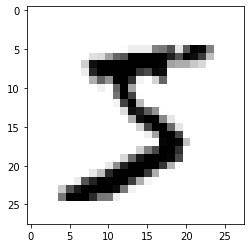

In [ ]:
# Donc ici on utilise matplotlib pour affciher les images manuscrites 

import matplotlib.pyplot as plt
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels[0]

5